## Insider Trades Analysis

Trades made by insiders are filed with the SEC on Form 4s. A large literature shows that these trades contain information about future stock performance.

Quandl data: Core US Insiders Data (SHARADAR/SF2)

In [3]:
import quandl
import pandas as pd
quandl.ApiConfig.api_key = "YOUR-KEY-HERE"

In [ ]:
df = quandl.get_table('SHARADAR/SF2', filingdate={'gte': '2022-12-31'}, paginate=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29246 entries, 0 to 29245
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ticker                           29246 non-null  object        
 1   filingdate                       29246 non-null  datetime64[ns]
 2   formtype                         29246 non-null  object        
 3   issuername                       29246 non-null  object        
 4   ownername                        29246 non-null  object        
 5   officertitle                     17629 non-null  object        
 6   isdirector                       29246 non-null  object        
 7   isofficer                        29246 non-null  object        
 8   istenpercentowner                29246 non-null  object        
 9   transactiondate                  20872 non-null  datetime64[ns]
 10  securityadcode                   29246 non-null  object   

In [10]:
df

,ticker,filingdate,formtype,issuername,ownername,officertitle,isdirector,isofficer,istenpercentowner,transactiondate,...,sharesownedfollowingtransaction,transactionpricepershare,transactionvalue,securitytitle,directorindirect,natureofownership,dateexercisable,priceexercisable,expirationdate,rownum
None,,,,,,,,,,,,,,,,,,,,,
0,ZYXI,2023-01-10,4,ZYNEX INC,MOORHEAD DANIEL J,Chief Financial Officer,N,Y,N,2023-01-09,...,26556.0,15.65,19860.0,Common Stock,D,None,NaT,NaN,NaT,1
1,ZYME,2023-01-06,4,ZYMEWORKS INC,MOORE PAUL ANDREW,Chief Scientific Officer,N,Y,N,2023-01-05,...,51500.0,NaN,NaN,Restricted Stock Unit,D,None,NaT,NaN,NaT,2
2,ZYME,2023-01-06,4,ZYMEWORKS INC,MOORE PAUL ANDREW,Chief Scientific Officer,N,Y,N,2023-01-05,...,77500.0,8.00,620000.0,Stock Option Right to Buy,D,None,NaT,8.00,2033-01-04,1
3,ZYME,2023-01-06,4,ZYMEWORKS INC,KLOMPAS NEIL A,President COO,N,Y,N,2023-01-05,...,58500.0,NaN,NaN,Restricted Stock Unit,D,None,NaT,NaN,NaT,2
4,ZYME,2023-01-06,4,ZYMEWORKS INC,KLOMPAS NEIL A,President COO,N,Y,N,2023-01-05,...,87500.0,8.00,700000.0,Stock Option Right to Buy,D,None,NaT,8.00,2033-01-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29241,AAMC,2023-01-04,4,ALTISOURCE ASSET MANAGEME,KOPCAK JASON A,None,Y,N,N,2022-12-30,...,1000.0,10.00,10000.0,Series N Preferred Stock,D,None,NaT,NaN,NaT,1
29242,AAL,2023-01-06,3,AMERICAN AIRLINES GROUP I,MAY DEVON E,EVP Chief Financial Officer,N,Y,N,NaT,...,205321.0,NaN,NaN,Common Stock,D,None,NaT,NaN,NaT,1
29243,AADI,2023-01-04,4,AADI BIOSCIENCE INC,DESAI NEIL,Executive Chairman,Y,Y,Y,2023-01-03,...,150000.0,12.31,1846500.0,Stock option right to buy,D,None,NaT,12.31,2033-01-03,1


In [11]:
df['ddate']=pd.to_datetime(df.filingdate)
df['month']=df.ddate.dt.month
df['year']=df.ddate.dt.year

In [12]:
# Subset for trades
df = df[df.formtype=='4'].copy()

## Transaction codes
The available [Transaction Codes] [Transaction Categories] Descriptions are as follows: 

[P] [General] Open market or private purchase of non-derivative or derivative security 

[S] [General] Open market or private sale of non-derivative or derivative security 

[V] [General] Transaction voluntarily reported earlier than required 

[A] [Rule 16b-3] Grant; award or other acquisition pursuant to Rule 16b-3(d) 

[D] [Rule 16b-3] Disposition to the issuer of issuer equity securities pursuant to Rule 16b-3(e) 

[F] [Rule 16b-3] Payment of exercise price or tax liability by delivering or withholding securities 

[I] [Rule 16b-3] Discretionary transaction in accordance with Rule 16b-3(f) 

[M] [Rule 16b-3] Exercise or conversion of derivative security exempted pursuant to Rule 16b-3 

[C] [Derivative Codes] Conversion of derivative security 

[E] [Derivative Codes] Expiration of short derivative position 

[H] [Derivative Codes] Expiration (or cancellation) of long derivative position with value received 

[O] [Derivative Codes] Exercise of out-of-the-money derivative security 

[X] [Derivative Codes] Exercise of in-the-money or at-the-money derivative security 

[G] [Other Section 16(b) Exempt] Bona fide gift 

[L] [Other Section 16(b) Exempt] Small acquisition under Rule 16a-6 

[W] [Other Section 16(b) Exempt] Acquisition or disposition by will or the laws of descent and distribution 

[Z] [Other Section 16(b) Exempt] Deposit into or withdrawal from voting trust 

[J] [Other] Other acquisition or disposition 

[K] [Other] Transaction in equity swap or instrument with similar characteristics 

[U] [Other] Disposition pursuant to a tender of shares in a change of control transaction

In [13]:
df.transactioncode.value_counts()

A    7599
M    4612
F    2737
S    2428
P     899
D     743
J     490
G     439
C     291
U      26
L      14
I       9
X       5
E       3
W       2
Z       2
Name: transactioncode, dtype: int64

In [14]:
# Subset for open-market purchases and sales
df = df[(df.transactioncode=='P') | (df.transactioncode=='S')].copy()

In [15]:
# Check transactionshares signing (transactionshares usually positive for purchases and negative for sales)
df.groupby('transactioncode').transactionshares.describe()

,count,mean,std,min,25%,50%,75%,max
transactioncode,,,,,,,,
P,896.0,97777.888393,1.009995e+06,-5206.0,236.5,2992.5,20000.0,27272727.0
S,2428.0,-239478.748353,4.206290e+06,-112863282.0,-10507.0,-2893.0,-823.5,-1.0


In [16]:
# Sum purchases and sales within a month
df_mthly = df.groupby(['ticker','ownername','year','month','transactioncode']).transactionshares.sum()
buys  = df_mthly.loc[(slice(None),slice(None),slice(None),slice(None),'P')]
sells = -1*df_mthly.loc[(slice(None),slice(None),slice(None),slice(None),'S')]

In [17]:
# Aggregate to firm-month level
buys = buys.groupby(level=['ticker','year','month']).sum()
buys.name = 'buys'
sells = sells.groupby(level=['ticker','year','month']).sum()
sells.name = 'sells'

In [18]:
# Calculate insider order-imbalance
bs = pd.merge(buys,sells, 'outer', left_index=True,right_index=True)
bs = bs.fillna(0)
# drop obs with negative buys or positive sells
bs = bs[(bs.buys >=0) & (bs.sells >=0)]
bs['oib'] = (bs.buys - bs.sells) / (bs.buys + bs.sells)
bs.oib.describe()

count    709.000000
mean      -0.515157
std        0.846563
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       -0.665226
max        1.000000
Name: oib, dtype: float64

In [19]:
bs

,,,buys,sells,oib
ticker,year,month,,,
ABM,2023,1,0.0,2520.0,-1.0
ABNB,2023,1,0.0,8000.0,-1.0
ABT,2023,1,0.0,4200.0,-1.0
ACAD,2023,1,0.0,17525.0,-1.0
ACCD,2023,1,74.0,74.0,0.0
...,...,...,...,...,...
ZI,2023,1,0.0,1041667.0,-1.0
ZM,2023,1,0.0,11018.0,-1.0
ZNTL,2023,1,0.0,10000.0,-1.0


<AxesSubplot:>

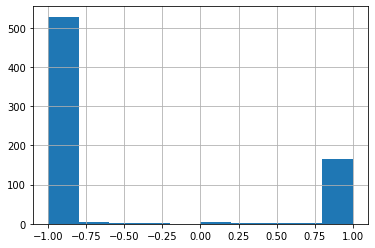

In [20]:
jan = bs.loc[(slice(None),2023,1)]
jan.sort_values('oib')
jan.oib.hist()

Add in trading volume and returns from SEP file

In [21]:
sep = quandl.get_table('SHARADAR/SEP', DATE={'gte': '2022-12-31'}, paginate=True)

In [22]:
sep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87627 entries, 0 to 87626
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ticker       87627 non-null  object        
 1   date         87627 non-null  datetime64[ns]
 2   open         87627 non-null  float64       
 3   high         87627 non-null  float64       
 4   low          87627 non-null  float64       
 5   close        87627 non-null  float64       
 6   volume       87627 non-null  float64       
 7   closeadj     87627 non-null  float64       
 8   closeunadj   87627 non-null  float64       
 9   lastupdated  87627 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(1)
memory usage: 6.7+ MB


In [24]:
# sep.volume.describe()
sep.head(10)

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated
None,,,,,,,,,,
0,ZYXI,2023-01-18,16.79,17.160,15.070,15.21,345529.0,15.21,15.21,2023-01-18
1,ZYXI,2023-01-17,16.62,16.830,16.270,16.74,179496.0,16.74,16.74,2023-01-17
2,ZYXI,2023-01-13,16.62,16.980,16.410,16.80,160222.0,16.80,16.80,2023-01-13
3,ZYXI,2023-01-12,16.34,16.640,16.000,16.62,167070.0,16.62,16.62,2023-01-12
4,ZYXI,2023-01-11,16.56,16.979,16.110,16.30,310493.0,16.30,16.30,2023-01-11
5,ZYXI,2023-01-10,15.59,17.240,15.575,16.54,503513.0,16.54,16.54,2023-01-10
6,ZYXI,2023-01-09,15.79,16.100,15.100,15.65,332975.0,15.65,15.65,2023-01-09
7,ZYXI,2023-01-06,14.55,17.250,14.530,15.65,1141885.0,15.65,15.65,2023-01-06
8,ZYXI,2023-01-05,14.15,14.260,13.960,14.14,122011.0,14.14,14.14,2023-01-05


In [27]:
sep['ddate']=pd.to_datetime(sep.date)
sep['month']=sep.ddate.dt.month
sep['year'] =sep.ddate.dt.year

In [28]:
# Aggregate volume to monthly frequency
sep_mthly = sep.groupby(['ticker','year','month']).volume.sum()

In [29]:
# Add monthly volume to insider order imbalance
bs = bs.merge(sep_mthly,how='inner',left_index=True,right_index=True)

In [30]:
# Calculate insider trading strength
bs['str'] = (bs.buys-bs.sells)/bs.volume
bs.str.describe()

count    666.000000
mean       0.061457
std        1.731623
min       -8.138352
25%       -0.005518
50%       -0.000975
75%       -0.000049
max       42.383890
Name: str, dtype: float64

In [38]:
bs['str_rnk'] = bs.groupby(['year','month'])['str'].rank(method='average')
bs.reset_index().sort_values(['year','month','str'])

,ticker,year,month,buys,sells,oib,volume,str,str_rnk
140,CNFR,2023,1,0.0,200000.0,-1.00000,24575.0,-8.138352,1.0
347,KRNL,2023,1,0.0,7493750.0,-1.00000,1530568.0,-4.896058,2.0
390,MIXT,2023,1,0.0,1300000.0,-1.00000,411910.0,-3.156029,3.0
338,KFS,2023,1,877.0,714997.0,-0.99755,524810.0,-1.360721,4.0
368,LOV,2023,1,0.0,410501.0,-1.00000,402781.0,-1.019167,5.0
...,...,...,...,...,...,...,...,...,...
371,LSAK,2023,1,213438.0,0.0,1.00000,186130.0,1.146715,662.0
356,LABP,2023,1,30909090.0,0.0,1.00000,11029560.0,2.802386,663.0
609,TZOO,2023,1,6820000.0,0.0,1.00000,1433668.0,4.757029,664.0
81,BDSX,2023,1,10869565.0,0.0,1.00000,1419911.0,7.655103,665.0
